# Import packages and csv file

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [207]:
plt.style.use('default')
sns.set_style("ticks")

In [208]:
df = pd.read_csv('coaster_db.csv')

# Dataset exploration

In [209]:
df.shape

(1087, 56)

In [210]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [211]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [212]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [213]:
df.isna().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

Lots of missing values

# Data cleaning

In [214]:
# Dropping useless fields

df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [215]:
df = df.drop(['Length', 'Speed', 'Opening date', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system','Trains', 'Park section','Capacity', 'G-force', 'Designer', 
       'Max vertical angle', 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style', 'Flash Pass available',
       'Acceleration', 'Restraints', 'Name', 'Type', 'Inversions_clean', 'speed1',
       'speed1_value', 'speed1_unit', 'speed2', 'Duration', 'Opened', 'Closing date'], axis = 1)

In [216]:
# Checking 
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
Cost                   object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_value          float64
height_unit            object
height_ft             float64
Gforce_clean          float64
dtype: object

### Fixing types

In [217]:
# Cost -> to int
print("Not null values: ", df['Cost'].notnull().sum())
print("Null values: ", df['Cost'].isnull().sum())

Not null values:  382
Null values:  705


Too much Null values, I will not use this field

In [218]:
# Opening date clean -> to datetime
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

### Fixing height
'height_value' have feet and meter values mixed. The feet values for the meter values are located in 'height_ft' field. I will erase meter value and replace them with the 'height_ft' values

In [219]:
df['height_value'].mask(df['height_unit'] == 'm', df['height_ft'], inplace = True)

In [220]:
# delete useless height fields
df = df.drop(['height_unit', 'height_ft'], axis = 1)

### Checking for duplicates

In [221]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

It seems there is no duplicates, but I check if 2 rows have the same coaster name

In [222]:
df.duplicated(subset = ['coaster_name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

Some rows are true

In [223]:
# Checking some coaster name to identify the duplicates reason
df.loc[(df['coaster_name'] == 'Derby Racer') | (df['coaster_name'] == 'Blue Streak (Conneaut Lake)') | (df['coaster_name'] == 'Big Thunder Mountain Railroad')  ]

,coaster_name,Location,Status,Manufacturer,Cost,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_value,Gforce_clean
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,"$140,000",1911,42.4200,-70.986,Wood,1911-01-01,NaN,NaN,NaN
59,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,1937,41.6349,-80.318,Wood,1938-05-23,50.0,77.0,NaN
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,"$140,000",1937,42.4200,-70.986,Wood,1911-01-01,NaN,NaN,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,1938,41.6349,-80.318,Wood,1938-05-23,50.0,77.0,NaN
159,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1979,NaN,NaN,Steel,NaT,35.0,104.0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,Steel,NaT,35.0,104.0,NaN
241,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1987,NaN,NaN,Steel,NaT,35.0,104.0,NaN
313,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1992,NaN,NaN,Steel,NaT,35.0,104.0,NaN


In [224]:
# removing duplicates
df = df.loc[~df.duplicated(subset = ['coaster_name', 'Location', 'opening_date_clean'])] \
  .reset_index(drop = True) \
  .copy()

### Status cleaning

In [225]:
# Status cleaning
df.groupby(['Status'])['Status'].count()

Status
Chapter 7 bankruptcy; rides dismantled and sold; property sold      2
Closed                                                             23
Closed in 2021                                                      1
Discontinued                                                        7
In Production                                                      11
Not Currently Operating                                             1
Operating                                                         646
Removed                                                           133
SBNO (Standing But Not Operating)                                   1
SBNO December 2019                                                  1
Temporarily Closed                                                  1
Temporarily closed                                                  1
Under Maintenance                                                   1
Under construction                                                 14
closed for ma

In [226]:
df.loc[
    (df['Status'] == 'Chapter 7 bankruptcy; rides dismantled and sold; property sold') |
    (df['Status'] == 'Closed in 2021') |
    (df['Status'] == 'closed for maintenance as of july 30 no reopening date known'),
    'Status'] = 'Closed'

In [227]:
df.loc[
    (df['Status'] == 'SBNO (Standing But Not Operating)') |
    (df['Status'] == 'SBNO December 2019'),
    'Status'] = 'Standing But Not Operating'

In [228]:
df.loc[(df['Status'] == 'Temporarily closed'), 'Status'] = 'Temporarily Closed'

In [229]:
# checking
df.groupby(['Status'])['Status'].count()

Status
Closed                         27
Discontinued                    7
In Production                  11
Not Currently Operating         1
Operating                     646
Removed                       133
Standing But Not Operating      2
Temporarily Closed              2
Under Maintenance               1
Under construction             14
Name: Status, dtype: int64

In [230]:
# Modify one outlier
df.loc[df['coaster_name'] == 'Smoky Mountain Alpine Coaster', 'height_value'] = 39
df['height_value'] = df['height_value'].astype(float)

In [231]:
# Renaming the columns

df = df.rename(columns = {'coaster_name': 'Name', 'year_introduced': 'Year', 'Type_Main': 'Fabric', 'speed_mph': 'Speed', 'height_value' : 'Height', 'Gforce_clean' : 'GForce'})
df.head(1)


,Name,Location,Status,Manufacturer,Cost,Year,latitude,longitude,Fabric,opening_date_clean,Speed,Height,GForce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.574,-73.978,Wood,1884-06-16,6.0,50.0,2.9


In [232]:
# df.to_csv('/content/coaster_db_cleaned.csv')

# Distributions

In [233]:
# df.pivot_table(values = 'speed_mph', index = 'Status', columns = 'Type_Main', aggfunc = 'count')
df.head(2)

,Name,Location,Status,Manufacturer,Cost,Year,latitude,longitude,Fabric,opening_date_clean,Speed,Height,GForce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.574,-73.978,Wood,1884-06-16,6.0,50.0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,12.0


In [234]:
df_des = df[['Year', 'Speed',	'Height']]
df_des.describe()

,Year,Speed,Height
count,990.000000,850.000000,880.000000
mean,1994.054545,49.017647,98.764364
std,23.872027,16.847266,58.160790
min,1884.000000,5.000000,8.000000
25%,1988.000000,37.300000,56.000000
50%,2000.000000,50.000000,91.900000
75%,2009.000000,58.000000,121.000000
max,2022.000000,149.100000,456.000000


Text(0.5, 1.0, 'Year distribution')

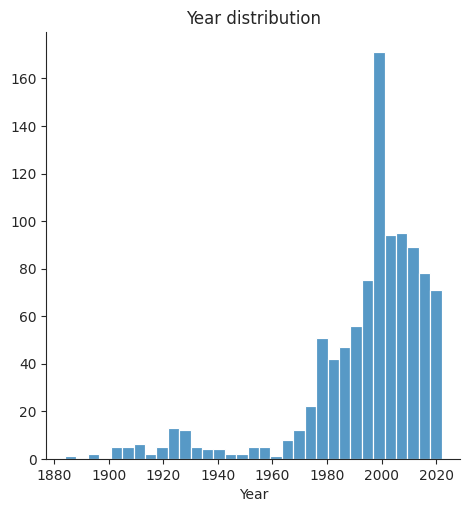

In [235]:
sns.displot(x = "Year", data = df).set_axis_labels("Year", "")
plt.title("Year distribution")

<Figure size 640x480 with 0 Axes>

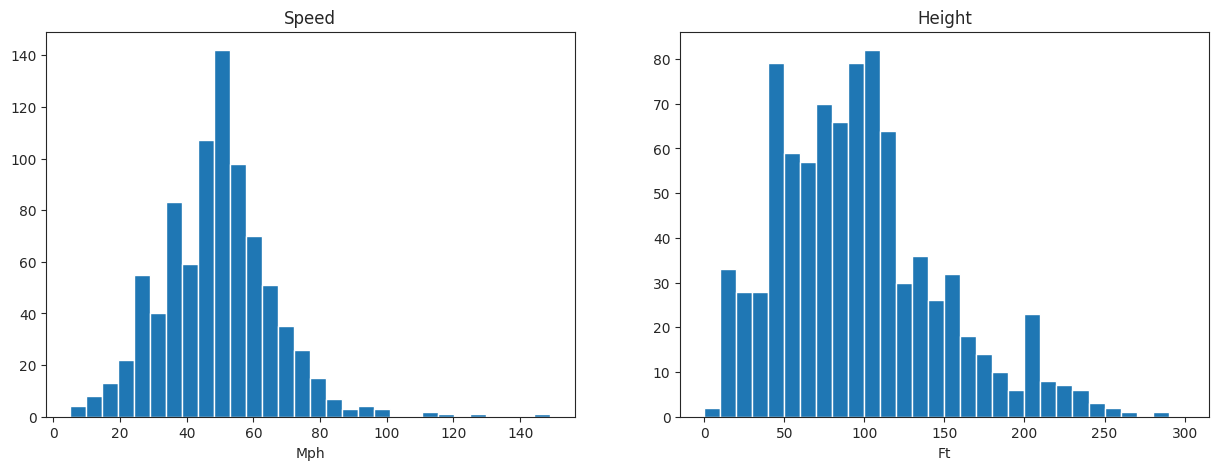

In [236]:
plt.figure()
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(x= df['Speed'], bins = 30)
plt.xlabel('Mph')
plt.title('Speed')
plt.subplot(1,2,2)
plt.hist(x = df['Height'], range = (0,300), bins = 30)
plt.xlabel('Ft')
plt.title('Height')
plt.show()

<Axes: xlabel='Speed', ylabel='Height'>

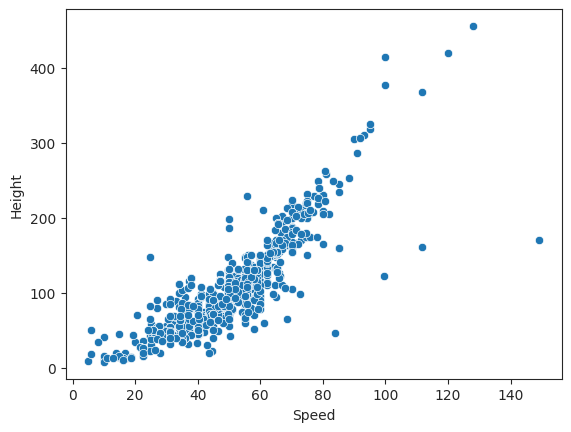

In [237]:
sns.scatterplot(x = "Speed", y = "Height", data = df)

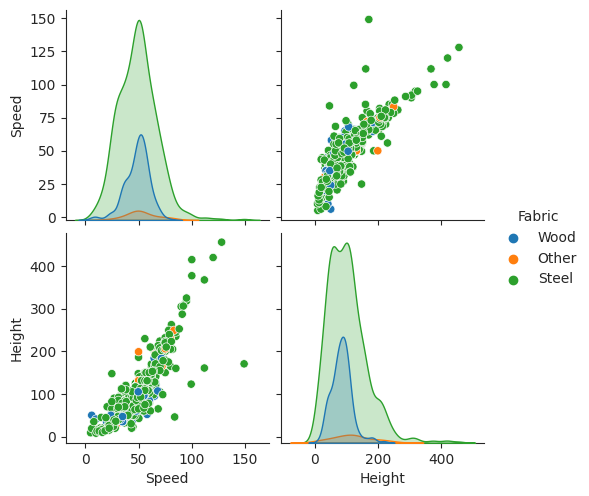

In [238]:
sns.pairplot(df, vars=['Speed', 'Height'], hue = 'Fabric')

# Correlations

In [239]:
corr = df_des.dropna().corr()

<Axes: >

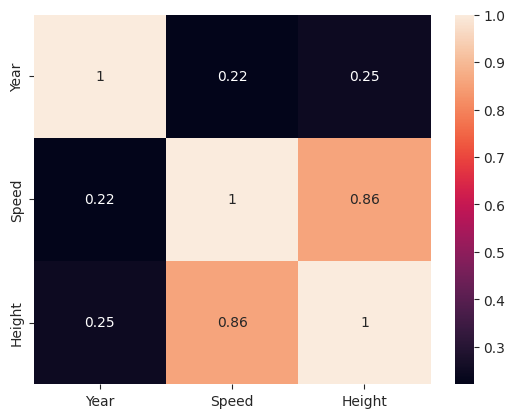

In [240]:
sns.heatmap(corr, annot = True)

# Map

In [241]:
map = px.scatter_geo(df, lat='latitude', lon = 'longitude', hover_name = 'Location')
map.update_layout(title = 'Coaster locations', title_x=1)
map.show()

# Insights

<Axes: ylabel='Location'>

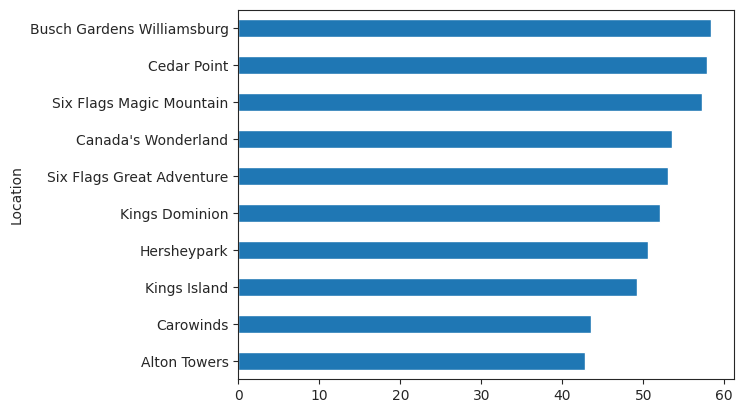

In [242]:
# Wich location have the fastest coaster ?

df.query('Location != "Other"') \
  .groupby('Location')['Speed'] \
  .agg(['mean', 'count']) \
  .query('count > = 10') \
  .sort_values('mean')['mean'] \
  .plot(kind = 'barh')